##### `02_pandas3.ipynb`

## `시계열(Time Series) 데이터`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 다양한 날짜 형식 데이터 변환 시도

date_strings = [
    '2025년 8월 5일',
    '15/01/2023',
    'Jan 15, 2023',
    '2023-01-15',
    '2023.01.15',
    '2025/08/05',
    '20230115',
    '15-Jan-2023',
]

for date in date_strings:
    # 예외 처리(에러 처리) 
    try:  # 일단 아래 블럭 해좌. 되면 좋고,
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except:  # 안되면 뻗지 말고, 아래 코드 실행해!
        print('err', date)

err 2025년 8월 5일
15/01/2023 -> 2023-01-15 00:00:00
Jan 15, 2023 -> 2023-01-15 00:00:00
2023-01-15 -> 2023-01-15 00:00:00
2023.01.15 -> 2023-01-15 00:00:00
2025/08/05 -> 2025-08-05 00:00:00
20230115 -> 2023-01-15 00:00:00
15-Jan-2023 -> 2023-01-15 00:00:00


In [8]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
print(daily_sales.head())



일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:
                    sales
date                     
2023-01-01  109934.283060
2023-01-02  105569.429486
2023-01-03  123735.698233
2023-01-04  136348.024536
2023-01-05   93042.167918


C:\Users\trueb\AppData\Local\Temp\ipykernel_15804\2809228211.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')


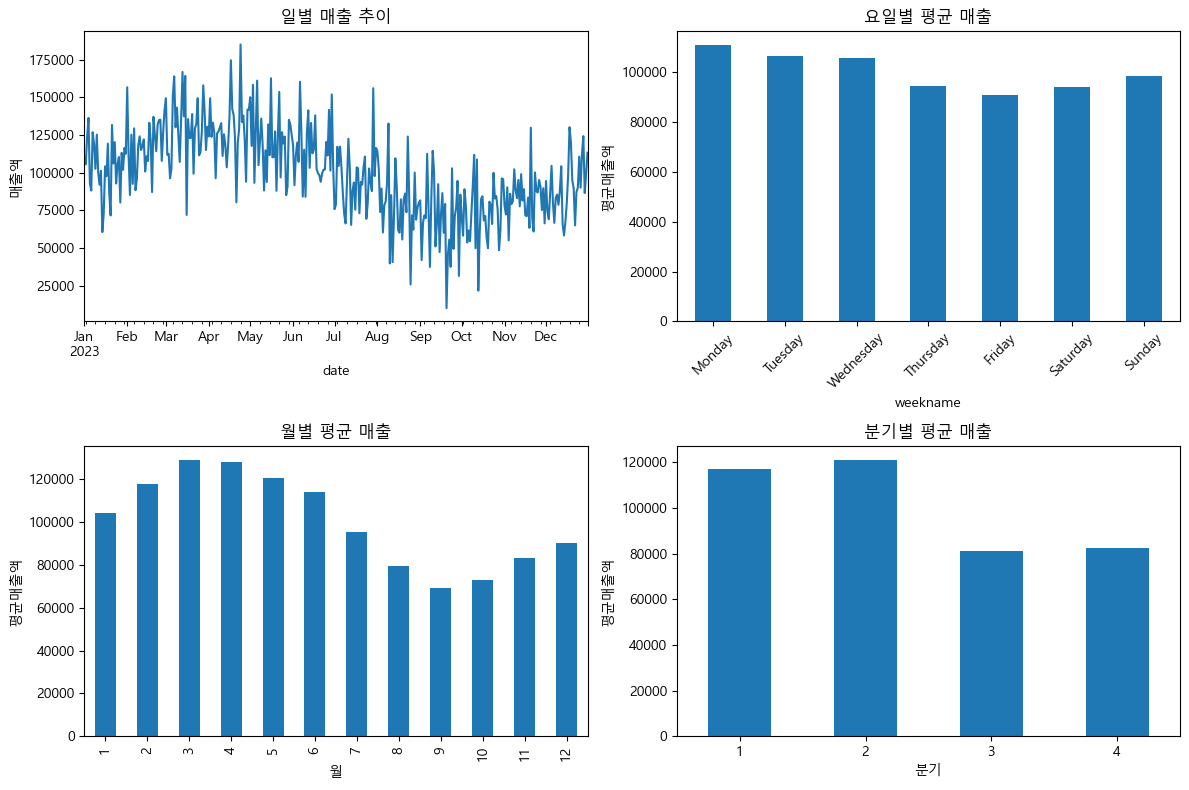

In [12]:
# Index (datetime index 라서 바로 접근)
daily_sales['year'] = daily_sales.index.year  # 년
daily_sales['month'] = daily_sales.index.month  # 월
daily_sales['day'] = daily_sales.index.day  # 일
daily_sales['weekday'] = daily_sales.index.weekday  # 요일, 월=0
daily_sales['weekname'] = daily_sales.index.day_name()  # 요일, 얘만 함수
daily_sales['quarter'] = daily_sales.index.quarter  # 분기

daily_sales.head()

# 요일별 평균 매출
weekday_avg = daily_sales.groupby('weekname')['sales'].mean()
# 원하는 순서대로 Series 나 DF 인덱스의 순서 바꾸기
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order)

# 시각화
plt.figure(figsize=(12, 8))

# 일별 매출 추이
plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

# 요일별 평균매출
plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')
plt.xticks(rotation=45)

# 월별 평균 매출
plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.title('월별 평균 매출')
plt.xlabel('월')
plt.ylabel('평균매출액')

# 분기별 매출 평균
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='bar')
plt.title('분기별 평균 매출')
plt.xticks(rotation=0)
plt.xlabel('분기')
plt.ylabel('평균매출액')

# Layout 겹치지 않게 조정
plt.tight_layout()
plt.show()

In [13]:
# 인덱싱 및 슬라이싱
f'전체 데이터 기간, {daily_sales.index.min()} ~ {daily_sales.index.max()}'

'전체 데이터 기간, 2023-01-01 00:00:00 ~ 2023-12-31 00:00:00'

In [15]:
# 특정 날짜 선택
d1 = daily_sales.loc['2023-01-15']
d1['sales']

np.float64(72661.82632991784)

In [18]:
# 날짜 범위 선택
jan_half = daily_sales['2023-01-01':'2023-01-15']
# 데이터 개수, 매출 총합
len(jan_half), jan_half['sales'].sum()

(15, np.float64(1557048.692157083))

In [20]:
# 부분 문자열 활용
daily_sales.loc['2023-04']

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-04-01,124116.291222,2023,4,1,5,Saturday,2
2023-04-02,149372.622003,2023,4,2,6,Sunday,2
2023-04-03,123774.752707,2023,4,3,0,Monday,2
2023-04-04,133182.424610,2023,4,4,1,Tuesday,2
2023-04-05,126463.065796,2023,4,5,2,Wednesday,2
2023-04-06,96328.378472,2023,4,6,3,Thursday,2
2023-04-07,126072.893472,2023,4,7,4,Friday,2
2023-04-08,127255.949952,2023,4,8,5,Saturday,2
2023-04-09,129899.974611,2023,4,9,6,Sunday,2


In [25]:
# 조건부 필터링 (weekname 컬럼이 Friday)
daily_sales[ daily_sales['weekname'] == 'Friday' ]

# 특정 월의 주말만 

# 6월 데이터만 뽑기
june = daily_sales.loc['2023-06']
# 토/일 만 True mask
weekend_mask = daily_sales.loc['2023-06']['weekday'].isin([5, 6])  # 0=월

june[weekend_mask]

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-06-03,111414.940332,2023,6,3,5,Saturday,2
2023-06-04,119996.234696,2023,6,4,6,Sunday,2
2023-06-10,84019.290727,2023,6,10,5,Saturday,2
2023-06-11,126593.103997,2023,6,11,6,Sunday,2
2023-06-17,138027.509610,2023,6,17,5,Saturday,2
2023-06-18,102502.903094,2023,6,18,6,Sunday,2
2023-06-24,102089.477070,2023,6,24,5,Saturday,2
2023-06-25,120406.110304,2023,6,25,6,Sunday,2


In [ ]:
# 마지막 10일간의 데이터
daily_sales.tail(10)

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-12-22,65061.339260,2023,12,22,4,Friday,4
2023-12-23,87182.157836,2023,12,23,5,Saturday,4
2023-12-24,90108.464058,2023,12,24,6,Sunday,4
2023-12-25,110666.444684,2023,12,25,0,Monday,4
2023-12-26,90111.609327,2023,12,26,1,Tuesday,4
2023-12-27,112146.823714,2023,12,27,2,Wednesday,4
2023-12-28,124251.868065,2023,12,28,3,Thursday,4
2023-12-29,86526.927892,2023,12,29,4,Friday,4
2023-12-30,99183.271269,2023,12,30,5,Saturday,4


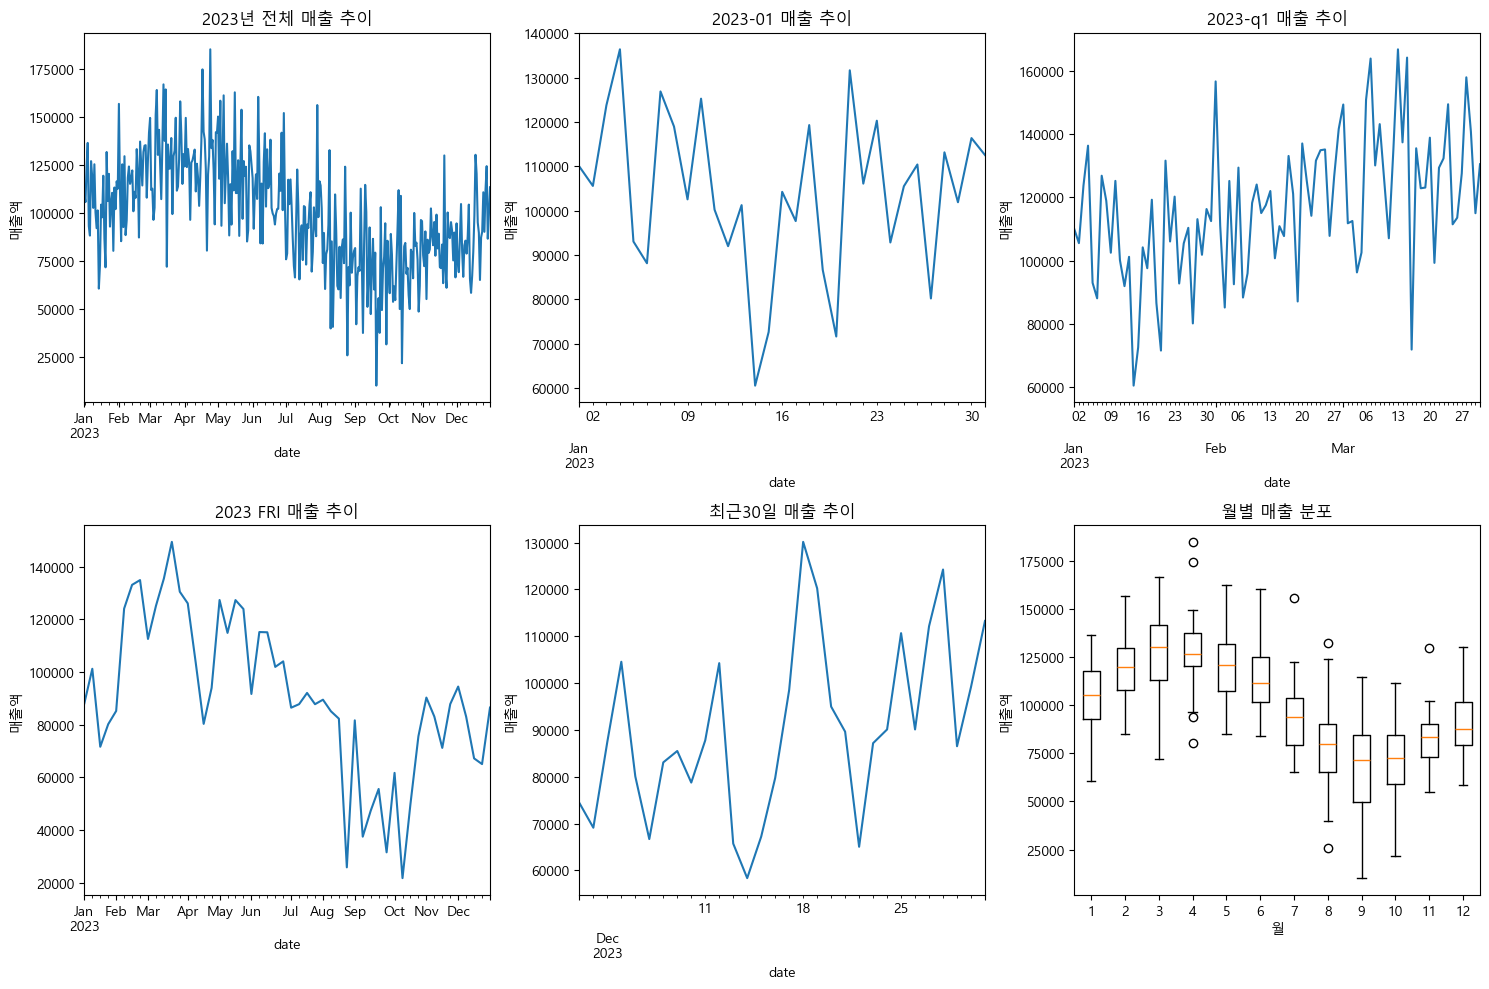

In [26]:
# 시각화
plt.figure(figsize=(15, 10))

# 전체 날짜-매출 데이터
plt.subplot(2, 3, 1)
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')

# 1월 데이터
plt.subplot(2, 3, 2)
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()
plt.title('2023-01 매출 추이')
plt.ylabel('매출액')

# 1Q 데이터
plt.subplot(2, 3, 3)
q1_data = daily_sales[daily_sales['quarter'] == 1]
q1_data['sales'].plot()
plt.title('2023-q1 매출 추이')
plt.ylabel('매출액')

# 금요일 매출추이
plt.subplot(2, 3, 4)
friday_data = daily_sales[ daily_sales['weekday'] == 4]
friday_data['sales'].plot()
plt.title('2023 FRI 매출 추이')
plt.ylabel('매출액')

# 최근 30일
plt.subplot(2, 3, 5)
last_30_data = daily_sales.tail(30)
last_30_data['sales'].plot()
plt.title('최근30일 매출 추이')
plt.ylabel('매출액')

# 월별 박스플롯(?)
plt.subplot(2, 3, 6)

# all_month = []
# for m in range(1, 13):
#     all_month.append(daily_sales[daily_sales['month'] == m]['sales'].values)

all_month = [daily_sales[daily_sales['month'] == m]['sales'].values for m in range(1, 13)]

plt.boxplot(all_month)
plt.title('월별 매출 분포')
plt.xlabel('월')
plt.ylabel('매출액')

plt.tight_layout()
plt.show()

In [27]:
%pip install -q statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 시계열 데이터 추세, 계절성 분해 함수
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
# 월 기준으로 리샘플링 (시간 간격 재종)
daily_sales.resample('M')['sales'].mean()

C:\Users\trueb\AppData\Local\Temp\ipykernel_15804\2453172275.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_sales.resample('M')['sales'].mean()


date
2023-01-31    104107.064418
2023-02-28    117734.578352
2023-03-31    128912.491972
2023-04-30    128234.072429
2023-05-31    120658.587866
2023-06-30    113914.972247
2023-07-31     95139.246890
2023-08-31     79330.974225
2023-09-30     69078.105530
2023-10-31     73108.426146
2023-11-30     83359.306665
2023-12-31     90306.009649
Freq: ME, Name: sales, dtype: float64

C:\Users\trueb\AppData\Local\Temp\ipykernel_15804\499060693.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_sales.resample('M')['sales'].mean()


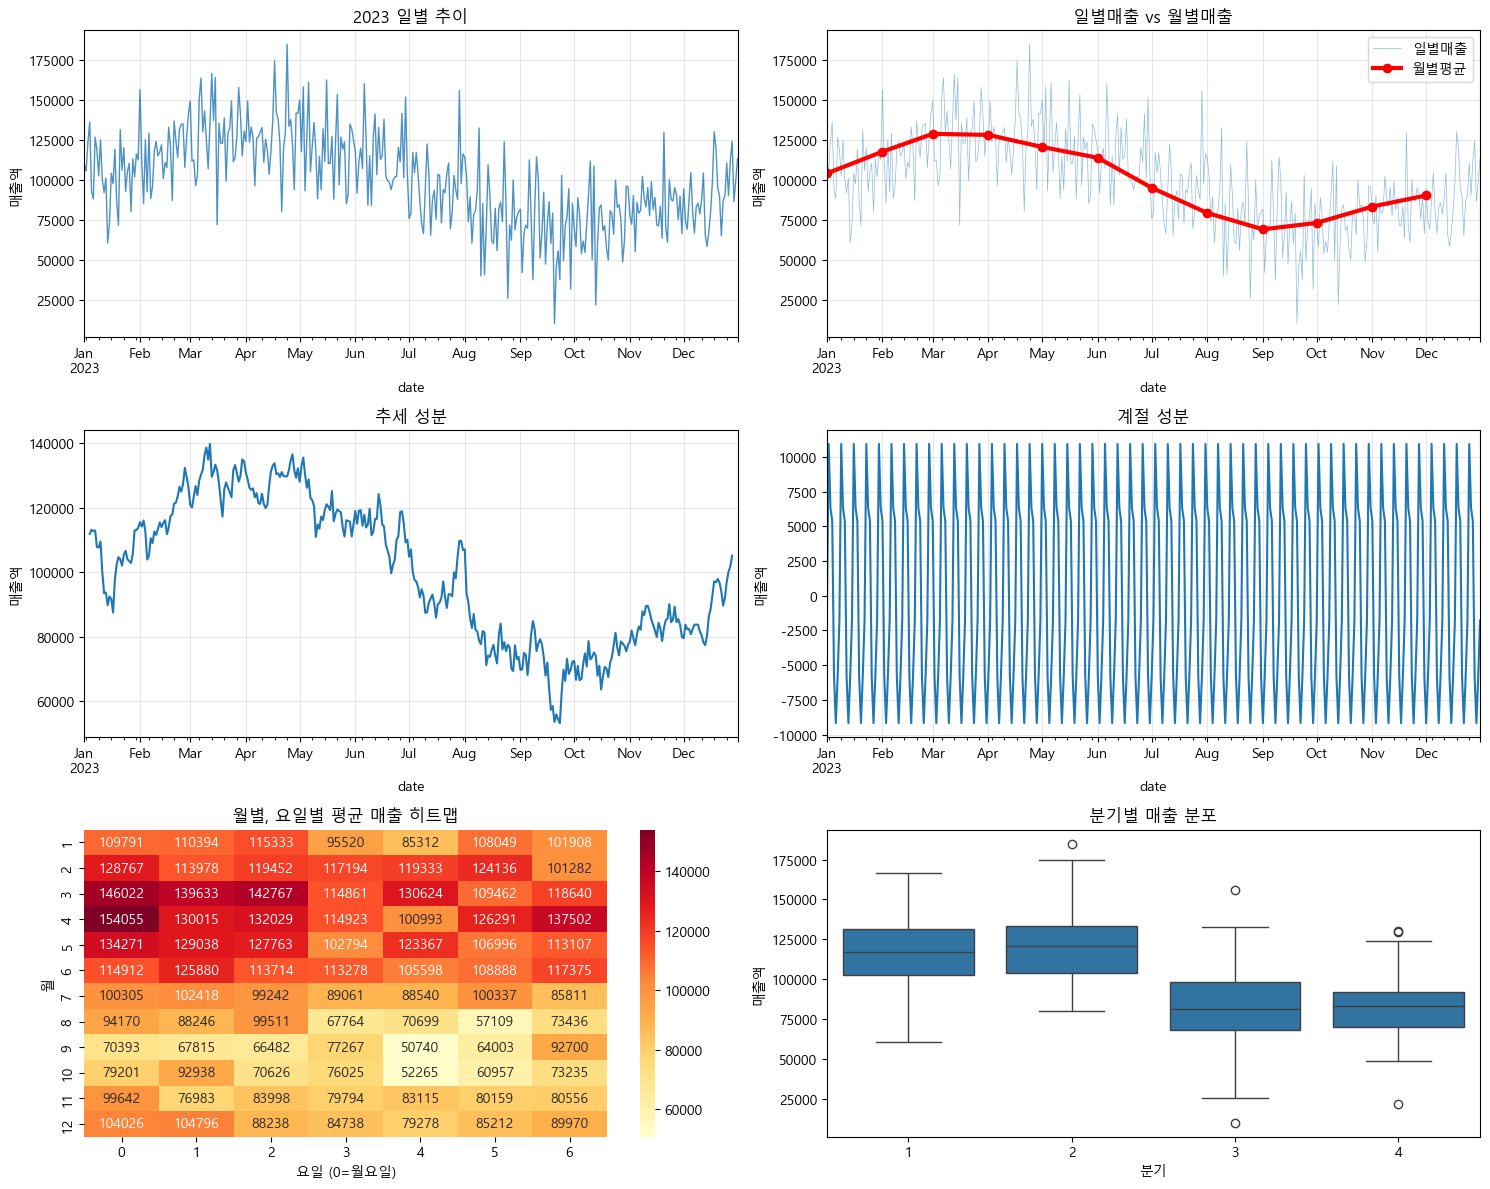

In [31]:
plt.figure(figsize=(15, 12))

# 전체 추이
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha=0.8)  # 두께, 투명더
plt.grid(True, alpha=0.3)  # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')

# 월별 평균 같이 보기
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.5, label='일별매출')
# 일단위 -> 월단위 간격 재조정 후 평균내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth=3, marker='o', label='월별평균', color='red')
plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)
plt.legend()  # 범례 표시 (label 표시)

# 시계열 분해 (Seasonal Decomposition)
# 1. Trend(추세) -> 전반적인 방향성 (증가/감소)
# 2. Seasonal(계절성)  -> 주기적으로 반복되는 패턴 (매주 금요일 매출 증가)
# 3. Residual (잔차) -> 추세/계절성을 제거한 나머지 요인(갑작스런 이벤트, 노이즈)
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7)  # 덧셈모델, 주간패턴

# 7일 이동평균으로 트렌드 확인
plt.subplot(3, 2, 3) 
decomp.trend.plot()
plt.title('추세 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

# 7일 이동평균으로 계절성 확인
plt.subplot(3, 2, 4)
decomp.seasonal.plot()
plt.title('계절 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

# 히트맵(Heatmap) - 월별, 요일별
plt.subplot(3, 2, 5)
pt = daily_sales.pivot_table(
    values='sales',
    index='month',
    columns='weekday',
    aggfunc='mean'
)
# annot=히트맵 숫자표시, fmt=숫자 형식, cmap=색깔(Yellow -> Orange -> Red)
sns.heatmap(pt, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('월별, 요일별 평균 매출 히트맵')
plt.xlabel('요일 (0=월요일)')
plt.ylabel('월')

# 분기별 박스플롯
plt.subplot(3, 2, 6)
sns.boxplot(x='quarter', y='sales', data=daily_sales)
plt.title('분기별 매출 분포')
plt.xlabel('분기')
plt.ylabel('매출액')

plt.tight_layout()
plt.show()

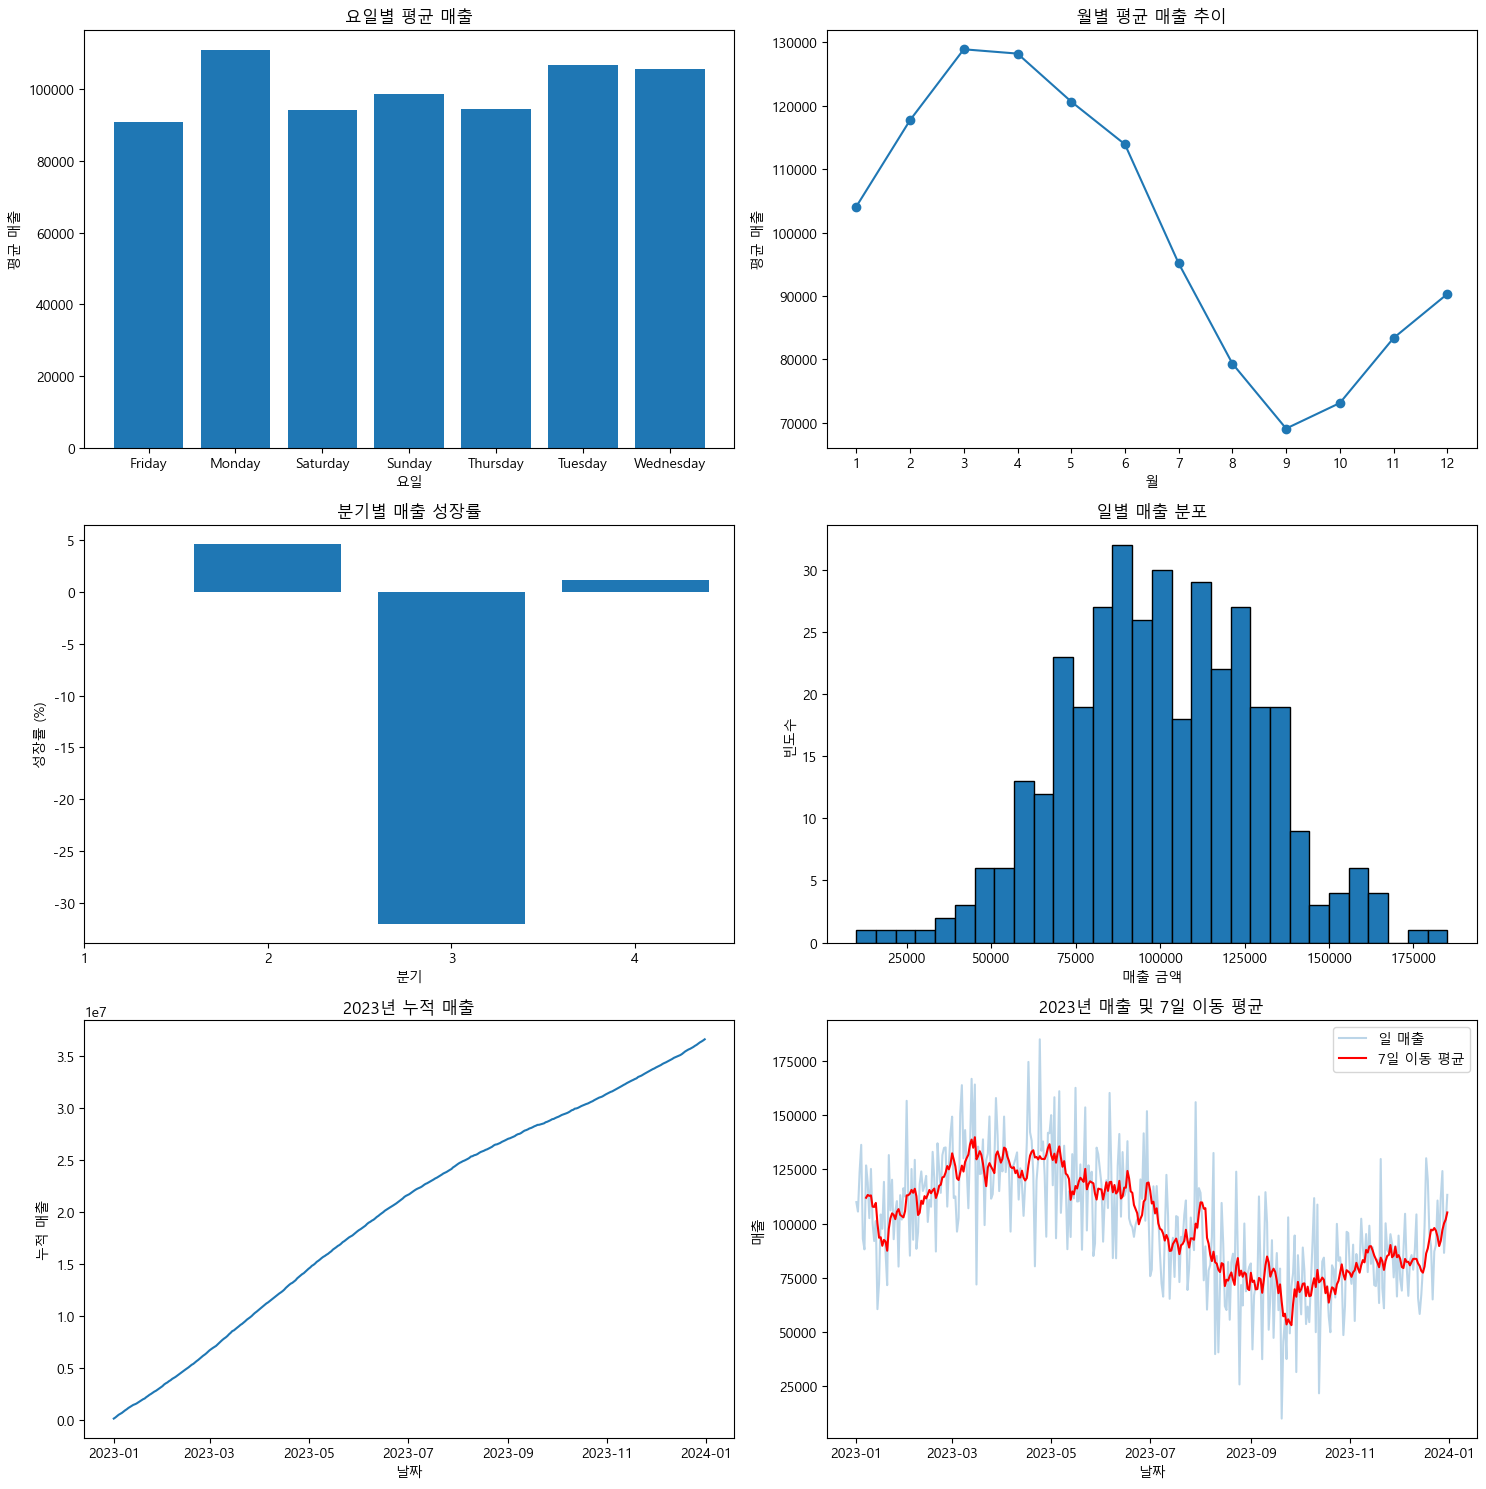

In [42]:
import matplotlib.pyplot as plt

# 1개의 큰 figure 안에 모든 subplot 구성
plt.figure(figsize=(15, 15))  # 한 번만 호출하여 전체 도화지 설정

# ① 요일별 평균 매출
plt.subplot(3, 2, 1)
weekday_avg_sales = daily_sales.groupby('weekname')['sales'].mean()
plt.bar(weekday_avg_sales.index, weekday_avg_sales.values)
plt.title('요일별 평균 매출')
plt.xlabel('요일')
plt.ylabel('평균 매출')

# ② 월별 평균 매출 추이
plt.subplot(3, 2, 2)
monthly_avg_sales = daily_sales.groupby('month')['sales'].mean()
plt.plot(monthly_avg_sales.index, monthly_avg_sales.values, marker='o')
plt.title('월별 평균 매출 추이')
plt.xlabel('월')
plt.ylabel('평균 매출')
plt.xticks(monthly_avg_sales.index)

# ③ 분기별 매출 성장률
plt.subplot(3, 2, 3)
quarterly_sales = daily_sales.groupby('quarter')['sales'].sum()
quarterly_growth = quarterly_sales.pct_change() * 100
plt.bar(quarterly_growth.index, quarterly_growth.values)
plt.title('분기별 매출 성장률')
plt.xlabel('분기')
plt.ylabel('성장률 (%)')
plt.xticks(quarterly_growth.index)

# ④ 매출 분포 히스토그램
plt.subplot(3, 2, 4)
plt.hist(daily_sales['sales'], bins=30, edgecolor='black')
plt.title('일별 매출 분포')
plt.xlabel('매출 금액')
plt.ylabel('빈도수')

# ⑤ 누적 매출 추이
plt.subplot(3, 2, 5)
cumulative_sales = daily_sales['sales'].cumsum()
plt.plot(cumulative_sales.index, cumulative_sales.values)
plt.title('2023년 누적 매출')
plt.xlabel('날짜')
plt.ylabel('누적 매출')

# ⑥ 7일 이동 평균
plt.subplot(3, 2, 6)
daily_sales['sales_MA7'] = daily_sales['sales'].rolling(window=7).mean()
plt.plot(daily_sales.index, daily_sales['sales'], alpha=0.3, label='일 매출')
plt.plot(daily_sales.index, daily_sales['sales_MA7'], color='red', label='7일 이동 평균')
plt.title('2023년 매출 및 7일 이동 평균')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.legend()

# 전체 그래프 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

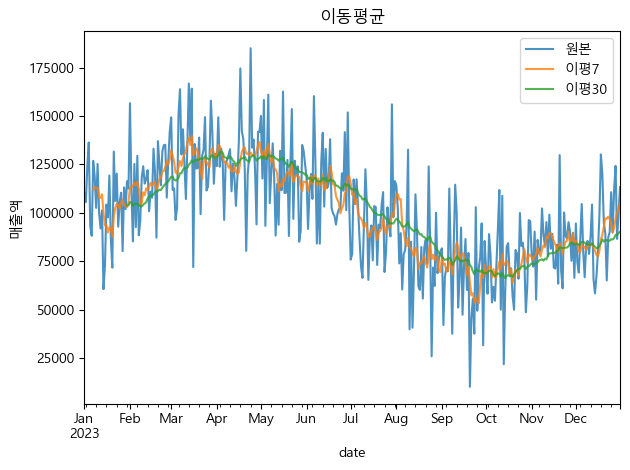

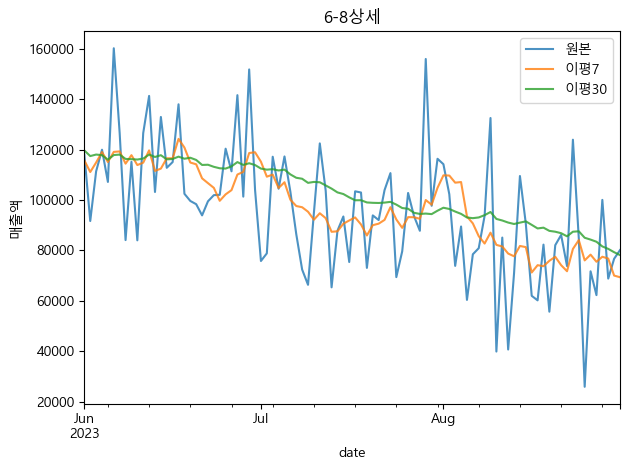

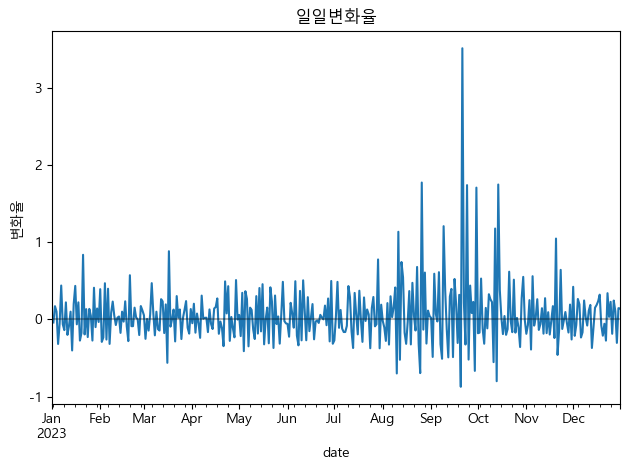

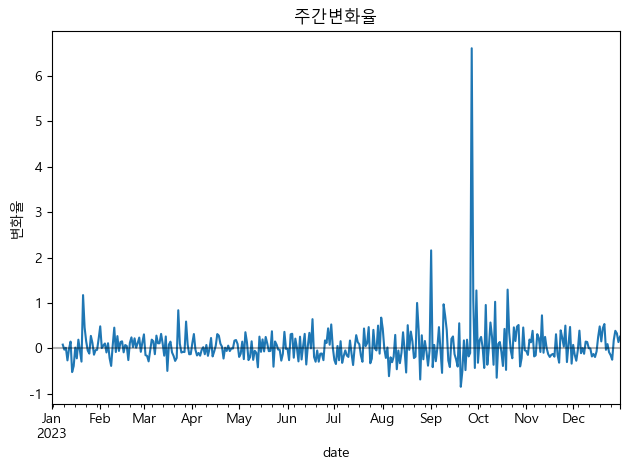

In [43]:
# 기본 시계열 연산
import matplotlib.pyplot as plt

# 시계열 데이터 연산
# 이동평균 7일
daily_sales['ma_7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['ma_30'] = daily_sales['sales'].rolling(window=30).mean()


plt.figure(figsize=(15, 8))
# 이동평균 시각화
daily_sales[['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('이동평균')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])
plt.tight_layout()
plt.show()

# 특정기간 확대(6-8월)
daily_sales.loc['2023-06':'2023-08'][['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('6-8상세')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])
plt.tight_layout()
plt.show()

# 변화율 계산(pct_change)
daily_sales['daily_change'] = daily_sales['sales'].pct_change()
daily_sales['weekly_change'] = daily_sales['sales'].pct_change(periods=7)  # 주간변화율

# 일일변화율 시각화
daily_sales['daily_change'].plot()
plt.title('일일변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# 주간변화율 시각화
daily_sales['weekly_change'].plot()
plt.title('주간변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

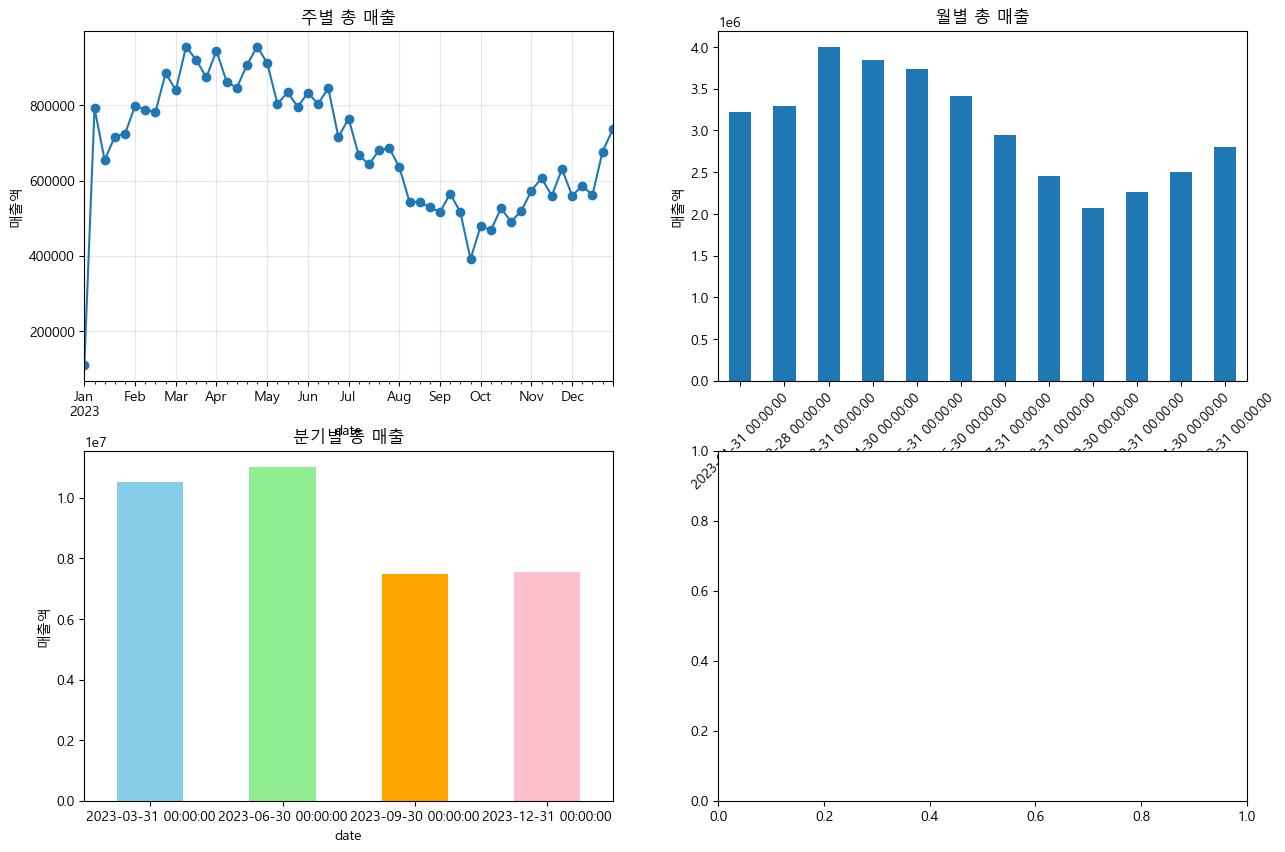

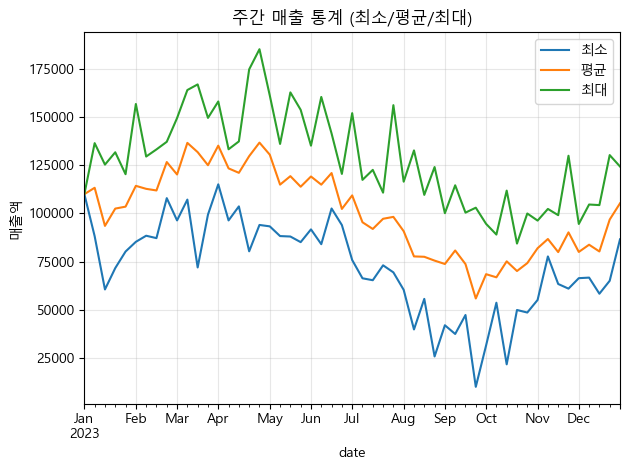

In [44]:
# 리샘플링 (원하는 주기로 나누어준다)

# 집계함수 적용 가능(사실상 그루핑)
weekly_stats = daily_sales['sales'].resample('W').agg(['sum', 'mean', 'min', 'max', 'std'])


# 주간 매출 총합
w_sales = daily_sales['sales'].resample('W').sum()
# 월간 매출 총합
m_sales = daily_sales['sales'].resample('ME').sum()  # 월 마지막날 기준 (MS)
# 분기 매출 총합
q_sales = daily_sales['sales'].resample('QE').sum()  # 분기 마지막날 기준 (QS)

# 6. 리샘플링 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
w_sales.plot(marker='o')
plt.title('주별 총 매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
m_sales.plot(kind='bar')
plt.title('월별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
q_sales.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('분기별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
weekly_stats[['min', 'mean', 'max']].plot()
plt.title('주간 매출 통계 (최소/평균/최대)')
plt.ylabel('매출액')
plt.legend(['최소', '평균', '최대'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# 실습: 주식 데이터 시계열 분석 (시뮬레이션)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 가상의 주식 데이터 생성
np.random.seed(42)

# 1년간의 일별 주식 데이터 생성
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
n_days = len(dates)

# 주식 가격 시뮬레이션 (기하 브라운 운동)
initial_price = 100000  # 초기 가격
volatility = 0.02  # 일일 변동성
drift = 0.0005  # 일일 드리프트

# 가격 변화율 생성
returns = np.random.normal(drift, volatility, n_days)
returns[0] = 0  # 첫날은 변화 없음

# 누적곱으로 가격 계산
price_multipliers = (1 + returns).cumprod()
prices = initial_price * price_multipliers

# 거래량 생성 (가격 변동성과 반비례 관계)
base_volume = 1000000
volume = base_volume + np.random.normal(0, 200000, n_days) - np.abs(returns) * 5000000
volume = np.maximum(volume, 100000)  # 최소 거래량 보장

# 데이터프레임 생성
stock_data = pd.DataFrame({
    'date': dates,        # 날짜
    'close': prices,      # 가격
    'volume': volume,     # 거래량
    'returns': returns,   # 전날 대비 가격 변화율
})

stock_data.set_index('date', inplace=True)

In [46]:
stock_data

,close,volume,returns
date,,,
2023-01-01,100000.000000,9.197559e+05,0.000000
2023-01-02,99773.471398,1.033492e+06,-0.002265
2023-01-03,101115.800810,9.352496e+05,0.013454
2023-01-04,104246.406382,8.647322e+05,0.030961
2023-01-05,103810.336628,8.244827e+05,-0.004183
...,...,...,...
2023-12-27,113619.495550,9.087687e+05,0.010887
2023-12-28,117159.285740,8.479129e+05,0.031155
2023-12-29,116963.020156,1.061140e+06,-0.001675
